Veri yükleme ve ön işleme

In [ ]:
#kütüphane aktarımı yapalım
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #grafikler ve görselleştirmeler, veriyi görsel analiz etme için. veri dağılımları, histogram, çizgi grafikleri ve diğer görselleştirmeler içindir.

from sklearn.datasets import load_digits #scikit learn'ün veri setleri modülünden istediğimiz dataseti çektik
from sklearn.model_selection import train_test_split, GridSearchCV #model seçim ve doğrulama işlemleri için. train_test_split, veriyi eğitim ve test setlerine ayırmak için kullanılır. GridSearchCV, modelin hiperparametrelerini iyi ayarlayabilmek için kapsamlı bir parametre tanımı yapar. amacı modelin doğruluğunu optimize etmektir.
from sklearn.preprocessing import StandardScaler #veri ön işleme içindir. standartscaler, verinin ortalama ve standart sapmasını kullanarak veriyi normalize eder. özelliklerin farklı farklı ölçekleri olduğu durumlarda verileri aynı ölçeğe getirir.
from sklearn.decomposition import PCA # boyut indirgeme yöntemleri içindir. pca (principal component analysis), veri setindeki boyutları indirgemek ve önemli özellikleri çıkartmak için kullanılır. veri setinin boyutunu azaltarak modelin hızını arttırma amaçlıdır.
from sklearn.svm import SVC #svm (support vector machine) modülünde svc (support vector classification sınıflandırma modelleri için kullanılır. iki sınıf arasındaki sınırı en iyi şekilde ayırmaya çalışan modeldir. 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier #RandomForestClassifier, karar ağaçlarının birleşiminden oluşan bir sınıflandırıcı olup yüksek doğruluk içerir. VotingClassifier, birden fazla sınıflandırıcının oy çokluğu ile tahmin yapmasını sağlar, her modelin oyu dikkate alınarak sonuç belirlenir.
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier, k en yakın komşu algosu.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #confusion_matrix, modelin tahmin ettiği ve gerçek etiketlerle karşılaştırarak karışıklık matrisi oluşturur.

In [12]:
#veri yükleyelim
digits = load_digits()
digits.target

array([0, 1, 2, ..., 8, 9, 8])

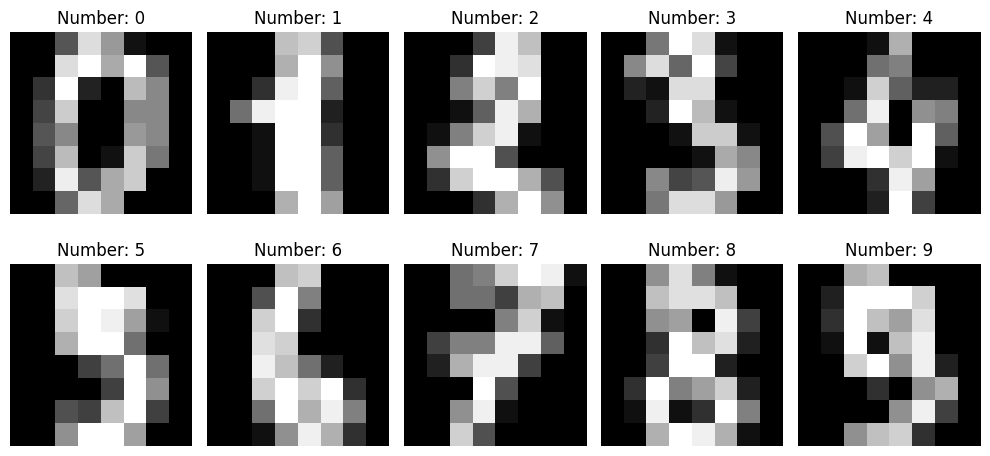

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5)) 
#görselleri düzenleyebileceğimiz bir ızgara yapısı oluşturuyoruz, figsize ile alt grafikteki her bir figürün boyutunu belirler

# Görselleri 2x5 grid formatında göster
for i, ax in enumerate(axes.flat):
    # Her bir sayıyı görselleştir
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Number: {digits.target[i]}")
    ax.axis('off')  # Eksenleri gizle

# Görselleri bir dosyaya kaydet
plt.tight_layout()
plt.savefig("digits_visualization.jpg", format='jpg')

# Görselleri göster (isteğe bağlı)
plt.show()

In [14]:
X, y= digits.data, digits.target

#train test split uygulayalım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#veri standardizasyonu
scaler = StandardScaler() #bu fonksiyon, veriyi ortalaması=0 ve standart sapması=1 olacak şekilde normalize eder
X_train_scaled = scaler.fit_transform(X_train) #eğitim verisinin ortalama ve standart sapmasını hesaplar (fit) ve veriyi bu değerlere dönüştürür
X_test_scaled = scaler.transform(X_test) #veriyi ortalaması=0 ve standart sapması=1 olacak şekilde dönüştürüp scale eder

PCA ile boyut indirgeme

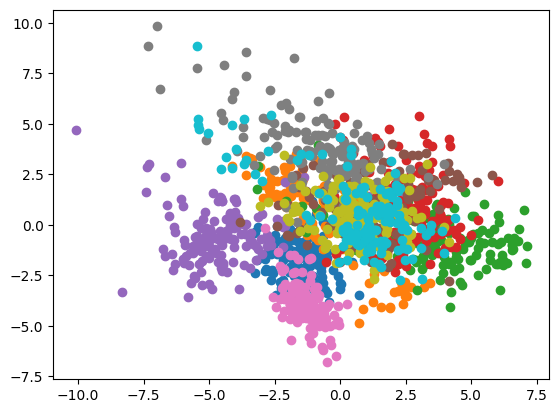

In [ ]:
pca = PCA(n_components=0.95) #pca nesnesi oluşturuluyor
X_train_pca = pca.fit_transform(X_train_scaled) #
X_test_pca = pca.transform(X_test_scaled)

pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

plt.figure()
for i in np.unique(y_train):
    plt.scatter(X_train_pca_2d[y_train == i, 0], X_train_pca_2d[y_train == i,1], label = digits.target_names[i])